In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#### Exercise 1:
*   Plot a square and apply the following transformations to it:
    - Scale factor of 2
    - Shear factor of 0.1
    - 20 Degrees Rotation
    - Translation by [2, 3]
*   Plot the transformed square

In [64]:
originalSquare = np.array([
    [1, 1],
    [-1, 1],
    [-1, -1],
    [1, -1],
    [1, 1]
])

originalSquare.shape                # (5, 2) --> 5 rows, 2 columns 
                                    #   each row is a point, columns are (x, y)
x_axis = originalSquare[:, 0]       # take all rows from the first column of originalSquare (i.e., 1, -1, -1, 1, 1)
y_axis = originalSquare[:, 1]       # take all rows from the second column of originalSquare (i.e., 1, 1, -1, -1, 1)

In [68]:
scaleFactor = 1
shearFactor = 0.1
rotationAngle = np.radians(20)
translationXY = [2, 3]

# Scaling (3 x 3 Matrix)
scaleMatrix = np.array([
    [scaleFactor, 0, 0], 
    [0, scaleFactor, 0],
    [0, 0, 1]
])

# Shearing (3 x 3 Matrix)
shearMatrix = np.array([
    [1, shearFactor, 0],
    [shearFactor, 1, 0],
    [0, 0, 1]
])

# Rotation (3 x 3)
rotationMatrix = np.array([
    [np.cos(rotationAngle), -np.sin(rotationAngle), 0],
    [np.sin(rotationAngle), np.cos(rotationAngle), 0],
    [0, 0, 1]
])

# Translation (3 x 3)
translationMatrix = np.array([
    [1, 0, translationXY[0]],
    [0, 1, translationXY[1]], 
    [0, 0, 1]
])

# Compute the homography matrix
homography_matrix = np.dot(translationMatrix, np.dot(rotationMatrix, np.dot(shearMatrix, scaleMatrix)))

In [69]:
# Apply the homography to each original point
#   Before doing that, we need to add an additional column of 1s to originalSquare because it has 2 columns and homographyMatrix has 3 columns
originalSquare_new = np.column_stack((originalSquare, np.ones(originalSquare.shape[0])))
transformedSquare = np.dot(homography_matrix, originalSquare_new.T)

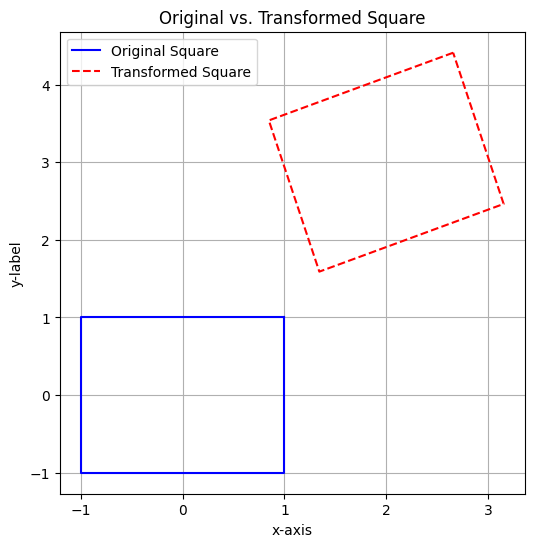

In [74]:
plt.figure(figsize = (6, 6))
plt.title('Original vs. Transformed Square')
plt.xlabel('x-axis')
plt.ylabel('y-label')
plt.grid(True)

x_axis_transformed = transformedSquare.T[:, 0]       # take all rows from the first column of transformedSquare (i.e., 1, -1, -1, 1, 1)
y_axis_transformed = transformedSquare.T[:, 1]       # take all rows from the second column of transformedSquare (i.e., 1, 1, -1, -1, 1)

plt.plot(x_axis, y_axis, label = 'Original Square', color = 'blue')
plt.plot(x_axis_transformed, y_axis_transformed, label = 'Transformed Square', linestyle = 'dashed', color = 'red')
plt.legend()

#### Exercise 2:
*   Using frame.jpg, make the frame straight and print the input/output images
    - Select four points in the following order --> top left, top right, bottom left, bottom right
    - Apply the homography transformation
*   The output image simulates a top-down view of the selected perspective (bordered by the selected four points)

In [75]:
from matplotlib.backend_bases import MouseButton
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [77]:
framePNG = cv2.imread('data/images/frame.jpg')
plt.imshow(cv2.cvtColor(framePNG, cv2.COLOR_BGR2RGB))
plt.title('Select Four Points in the Following Order: Top Left, Top Right, Bottom Left, Bottom Right')

selectedPoints = plt.ginput(4, show_clicks = True, mouse_add = MouseButton.LEFT, mouse_pop = MouseButton.RIGHT, mouse_stop = MouseButton.MIDDLE)
plt.close()

In [80]:
inputPoints = np.array(selectedPoints, dtype  = np.float32)

width = (np.linalg.norm(inputPoints[0] - inputPoints[1]), np.linalg.norm(inputPoints[2] - inputPoints[3]))
height = (np.linalg.norm(inputPoints[0] - inputPoints[2]), np.linalg.norm(inputPoints[1] - inputPoints[3]))

width = int(np.max(width))      # assign the bigger width as the width of the transformed image
height = int(np.max(height))    # assign the bigger height as the height of the transformed image

outputPoints = np.array([
    (0, 0),
    (width - 1, 0),
    (width - 1, height - 1),
    (0, height - 1)
], dtype = np.float32)

In [81]:
homography = cv2.getPerspectiveTransform(inputPoints, outputPoints)
straightenedFrame = cv2.warpPerspective(framePNG, homography, (width, height), flags = cv2.INTER_LINEAR)

In [82]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(framePNG, cv2.COLOR_BGR2RGB))
plt.title('Original frame.jpg')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(straightenedFrame, cv2.COLOR_BGR2RGB))
plt.title('Transformed frame.jpg (Top-Down View)')

AttributeError: module 'cv2' has no attribute 'COLORBGR2RGB'

: 